# Project: Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10000 movies collected from The Movie Database.

#### Column Names
<ul>
<li>id</li>
<li>popularity</li>
<li>imdb_id</li>
<li>budget</li>
<li>homepage</li>
<li>overview</li>
<li>revenue</li>
<li>original_title</li>
<li>director</li>
<li>tagline</li>
<li>runtime</li>
<li>release_date</li>
<li>vote_count</li>
<li>vote_average</li>
<li>release_year</li>
<li>budget_adj</li>
<li>revenue_adj</li>

These columns below are JSON columns and will not be analysed:
<li>cast</li>
<li>genres</li>
<li>keywords</li>
<li>production_companies</li>
</ul>

### Question(s) for Analysis

The dependent variable in my analysis will be vote_average and the independent variables will be budget, popularity and runtime.

<ul>
<li>How do the budget, popularity and runtime affect average votes?</li>
</ul>


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [151]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I dropped duplicate entries

In [152]:
df.drop_duplicates(subset="id", inplace=True)

I dropped the columns I do not need for this analysis.

In [153]:
drop_columns = ["id", "imdb_id", "original_title", "cast", "director", "homepage", "tagline", "keywords", "overview", "genres", "production_companies", "release_date", "release_year", "budget_adj", "revenue_adj"]

df.drop(drop_columns, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,runtime,vote_count,vote_average
0,32.985763,150000000,1513528810,124,5562,6.5
1,28.419936,150000000,378436354,120,6185,7.1
2,13.112507,110000000,295238201,119,2480,6.3
3,11.173104,200000000,2068178225,136,5292,7.5
4,9.335014,190000000,1506249360,137,2947,7.3


Getting a general summary of the data.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10865 non-null  float64
 1   budget        10865 non-null  int64  
 2   revenue       10865 non-null  int64  
 3   runtime       10865 non-null  int64  
 4   vote_count    10865 non-null  int64  
 5   vote_average  10865 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 594.2 KB


From the summary above, it can be seen that there are no missing values in the dataset.

In [155]:
df.nunique()

popularity      10814
budget            557
revenue          4702
runtime           247
vote_count       1289
vote_average       72
dtype: int64

I created a function to plot my histograms

In [156]:
def plot_hist(df, attr, x_label, y_label, title):
    df[attr].hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

<a id='eda'></a>
## Exploratory Data Analysis

### How does the popularity of a movie affect the average user votes?

Summary of the popularity attribute.

In [157]:
df.popularity.describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

Scatter plot of Popularity against Average user votes. I did this to find out if there is a linear relationship between the two variables.

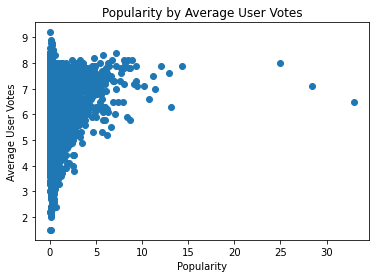

In [158]:
plt.scatter(df.popularity, df.vote_average)
plt.xlabel("Popularity")
plt.ylabel("Average User Votes")
plt.title("Popularity by Average User Votes");

### How does the runtime of a movie affect the users ratings?

In [159]:
df.runtime.describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

The histogram shows that most movies have a runtime of less than 200 minutes.

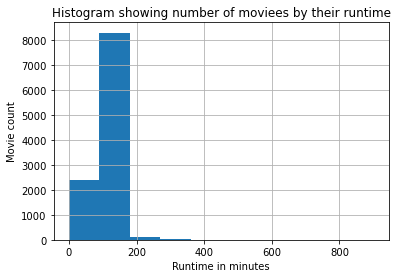

In [160]:
plot_hist(df, "runtime", "Runtime in minutes", "Movie count", "Histogram showing number of moviees by their runtime")


I first removed the rows wih runtime values of over 400 minutes because there are not a lot of them and they will affect the visualizations. I then converted the minutes into hours, split them into bins and created a new column for it.

In [161]:
df = df[df.runtime < 400]

In [162]:
bins_runtime = np.arange(400, step=60)
labels = []

for i in bins_runtime[1:]:
    labels.append("{0} hour(s)".format(i/60))

df["runtime_summary"] = pd.cut(df.runtime, bins=bins_runtime, labels=labels)
df.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,runtime_summary
0,32.985763,150000000,1513528810,124,5562,6.5,3.0 hour(s)
1,28.419936,150000000,378436354,120,6185,7.1,2.0 hour(s)
2,13.112507,110000000,295238201,119,2480,6.3,2.0 hour(s)
3,11.173104,200000000,2068178225,136,5292,7.5,3.0 hour(s)
4,9.335014,190000000,1506249360,137,2947,7.3,3.0 hour(s)


From the bar chart, I can see that run for less than an hour have the highest ratings

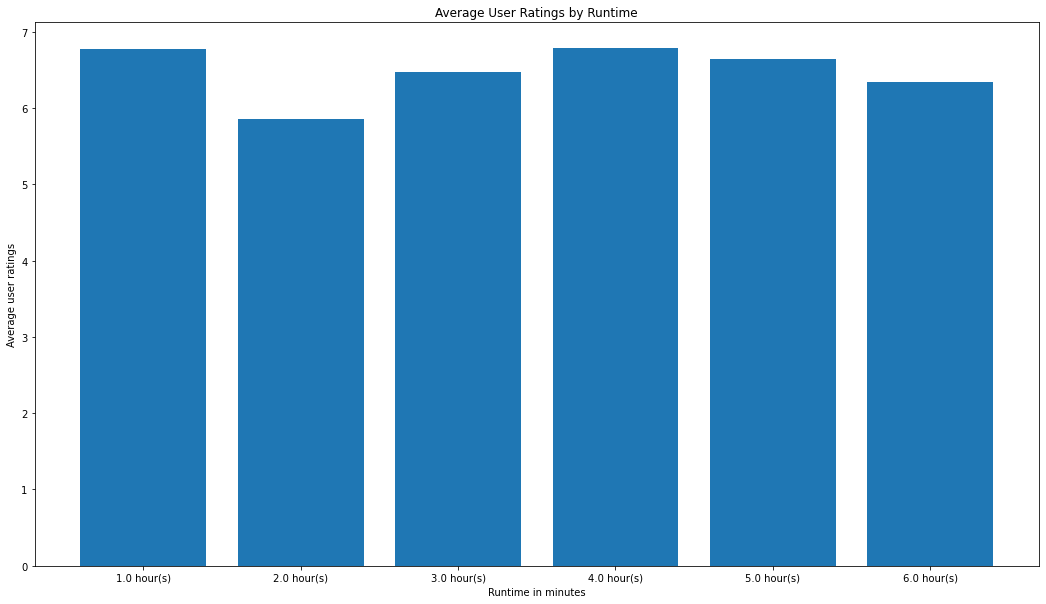

In [163]:
size = np.arange(1, len(bins_runtime))
runtime_means = df.groupby("runtime_summary")["vote_average"].mean()

plt.subplots(figsize=(18, 10))
plt.bar(size, runtime_means, tick_label=labels)
plt.xlabel("Runtime in minutes")
plt.ylabel("Average user ratings")
plt.title("Average User Ratings by Runtime");

### How does the budget amount affect the user rating?

In [164]:
df.budget.describe()

count    1.085100e+04
mean     1.463210e+07
std      3.091353e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

I dropped the rows that have a budget of 0 because they will be irrelevant to this analysis

In [165]:
df_budget = df.drop(df[df.budget == 0].index)
df_budget.budget.describe()

count    5.168000e+03
mean     3.072230e+07
std      3.888835e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

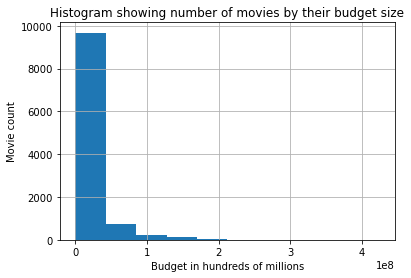

In [166]:
plot_hist(df, "budget", "Budget in hundreds of millions", "Movie count", "Histogram showing number of movies by their budget size")

From the graph above, I can infer that most movies have a budget less than 100,000,000.

I then converted budget values into discrete values based on the quartiles.

In [167]:
bin_budget = [1e+00, 6e+06, 1.7e+07, 4e+07, 4.25e+08]
labels_budget = ["low", "medium", "high", "very high"]

df_budget["budget_summary"] = pd.cut(df_budget.budget, bins=bin_budget, labels=labels_budget)
df_budget.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,runtime_summary,budget_summary
0,32.985763,150000000,1513528810,124,5562,6.5,3.0 hour(s),very high
1,28.419936,150000000,378436354,120,6185,7.1,2.0 hour(s),very high
2,13.112507,110000000,295238201,119,2480,6.3,2.0 hour(s),very high
3,11.173104,200000000,2068178225,136,5292,7.5,3.0 hour(s),very high
4,9.335014,190000000,1506249360,137,2947,7.3,3.0 hour(s),very high


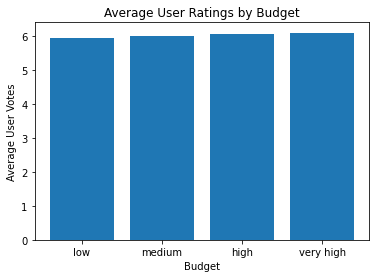

In [168]:
budget_means = df_budget.groupby("budget_summary").vote_average.mean()

plt.bar([1, 2, 3, 4], budget_means,tick_label=labels_budget);
plt.xlabel("Budget")
plt.ylabel("Average User Votes")
plt.title("Average User Ratings by Budget");

From the plot, it can be seen that movies with higher budgets have better ratings. Although, the difference in user ratings is not much.

### How do both runtime and budget amount affect the avergae user ratings?

In [169]:
df_group = df_budget.groupby(["runtime_summary", "budget_summary"]).mean()
df_group

popularity        budget       revenue  \
runtime_summary budget_summary                                           
1.0 hour(s)     low               0.331716  6.212643e+05  8.076926e+05   
                medium                 NaN           NaN           NaN   
                high                   NaN           NaN           NaN   
                very high         0.582192  6.000000e+07  0.000000e+00   
2.0 hour(s)     low               0.503486  2.606308e+06  1.178416e+07   
                medium            0.706267  1.135860e+07  2.785508e+07   
                high              0.940878  2.731604e+07  6.044567e+07   
                very high         1.512466  7.937306e+07  1.815467e+08   
3.0 hour(s)     low               0.608369  3.047756e+06  1.844853e+07   
                medium            0.831365  1.161131e+07  4.706080e+07   
                high              1.165684  2.879711e+07  8.079554e+07   
                very high         2.408939  9.846694e+07  3.070683e+08   
4.0 hour(s)     low               0.333935  1.384906e+06  1.762375e+06   
                medium            0.935253  1.162196e+07  4.351537e+07   
                high              0.877021  2.808333e+07  9.992686e+07   
                very high         2.126872  9.750000e+07  4.327924e+08   
5.0 hour(s)     low                    NaN           NaN           NaN   
                medium                 NaN           NaN           NaN   
                high              0.385034  2.527875e+07  1.443750e+07   
                very high              NaN           NaN           NaN   
6.0 hour(s)     low                    NaN           NaN           NaN   
                medium                 NaN           NaN           NaN   
                high              0.289206  1.900000e+07  4.356395e+05   
                very high         0.321600  6.000000e+07  0.000000e+00   

                                   runtime   vote_count  vote_average  
runtime_summary budget_summary                                         
1.0 hour(s)     low              22.000000    68.461538      6.580769  
                medium                 NaN          NaN           NaN  
                high                   NaN          NaN           NaN  
                very high        28.000000   114.000000      5.700000  
2.0 hour(s)     low              95.563847   119.411277      5.878524  
                medium           99.546500   196.280920      5.906424  
                high            102.015080   330.237512      5.896230  
                very high       102.677835   742.663660      5.895490  
3.0 hour(s)     low             134.074074   179.120370      6.585185  
                medium          134.701657   276.983425      6.588950  
                high            132.883333   477.290000      6.611667  
                very high       136.551220  1455.485366      6.482195  
4.0 hour(s)     low             189.250000    34.125000      6.562500  
                medium          192.818182   354.909091      7.200000  
                high            194.333333   439.750000      7.016667  
                very high       196.100000  1529.800000      6.710000  
5.0 hour(s)     low                    NaN          NaN           NaN  
                medium                 NaN          NaN           NaN  
                high            258.750000    49.500000      6.850000  
                very high              NaN          NaN           NaN  
6.0 hour(s)     low                    NaN          NaN           NaN  
                medium                 NaN          NaN           NaN  
                high            337.000000    28.000000      6.400000  
                very high       352.000000    31.000000      6.100000

In [170]:
df_group.vote_average

runtime_summary  budget_summary
1.0 hour(s)      low               6.580769
                 medium                 NaN
                 high                   NaN
                 very high         5.700000
2.0 hour(s)      low               5.878524
                 medium            5.906424
                 high              5.896230
                 very high         5.895490
3.0 hour(s)      low               6.585185
                 medium            6.588950
                 high              6.611667
                 very high         6.482195
4.0 hour(s)      low               6.562500
                 medium            7.200000
                 high              7.016667
                 very high         6.710000
5.0 hour(s)      low                    NaN
                 medium                 NaN
                 high              6.850000
                 very high              NaN
6.0 hour(s)      low                    NaN
                 medium                 NaN


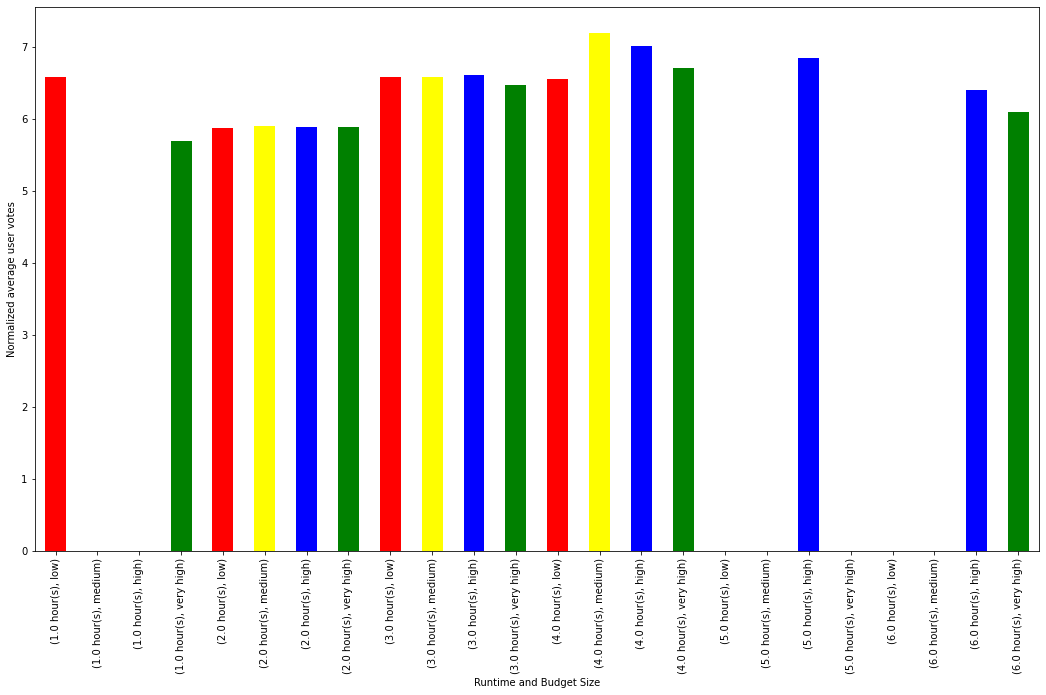

In [171]:
total = df_budget.groupby(["budget_summary"])["vote_average"].mean()

plt.subplots(figsize=(18,10))
prop = df_group["vote_average"] / total
df_group.vote_average.plot(kind="bar", title="", color=["red", "yellow", "blue", "green"]);
plt.xlabel("Runtime and Budget Size")
plt.ylabel("Normalized average user votes");


<a id='conclusions'></a>
## Conclusions

After looking at the plots of the various independent variables against the average user votes, I found out that movies with a runtime of less than 1 hour have the highest average user votes but also, those with runtime of more than 3 hours also have high average user votes.

The average user votes are also propotional to the budget size which means that movies with large budgets have better user ratings.

But when compared with runtime, I found out that runtime is a more significant factor than budget size when determining how it affects user ratings. It still shows that movies with a runtime of 2 hours generally do not have high user ratings regardless of budget size.

### Limitations
In the first section, I could not find a relationship between popularity and the user votes. The popularity attribute was not defined well and there was no metric provided to tell how 'popularity' was measured.

I also did not take into account the number of votes. It might have changed the results considering that movies with less vote counts might have higher ratings.
